# Problemset 4

Peijin Li

In [37]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
import seaborn as sns## implement a maploptlib thing 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Read in data
donotcall = pd.read_csv("donotcall.csv")
donotcall.head()

,caller_phone,violation_date,consumer_area_code,subject,is_robocall
0,9495063579,2020-03-30 14:07:00,858,Other,N
1,8443555004,2020-03-19 21:46:00,479,No Subject Provided,Y
2,8005256699,2020-03-30 18:47:00,619,Other,Y
3,9152680729,2020-03-19 17:35:00,479,No Subject Provided,Y
4,7186535424,2020-03-19 11:42:00,479,No Subject Provided,Y


1.Examine the dataset and discuss the following:
(a) Attribute types;(b) Dimensionality;(c) Missing values

(a) Attribute types

In [2]:
print(donotcall.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82058 entries, 0 to 82057
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   caller_phone        78277 non-null  object
 1   violation_date      82058 non-null  object
 2   consumer_area_code  82058 non-null  int64 
 3   subject             82058 non-null  object
 4   is_robocall         75961 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.1+ MB
None


There are in total five features in this dataset, only one variable(["subject"]) is int64, other four are strings/objects. 

(b) Dimensionality

In [3]:
donotcall.shape

(82058, 5)

This dataset includes 82058 rows and 5 columns

(c) Missing values

In [4]:
## count the number of nulls
donotcall.isnull().sum()

caller_phone          3781
violation_date           0
consumer_area_code       0
subject                  0
is_robocall           6097
dtype: int64

<AxesSubplot:>

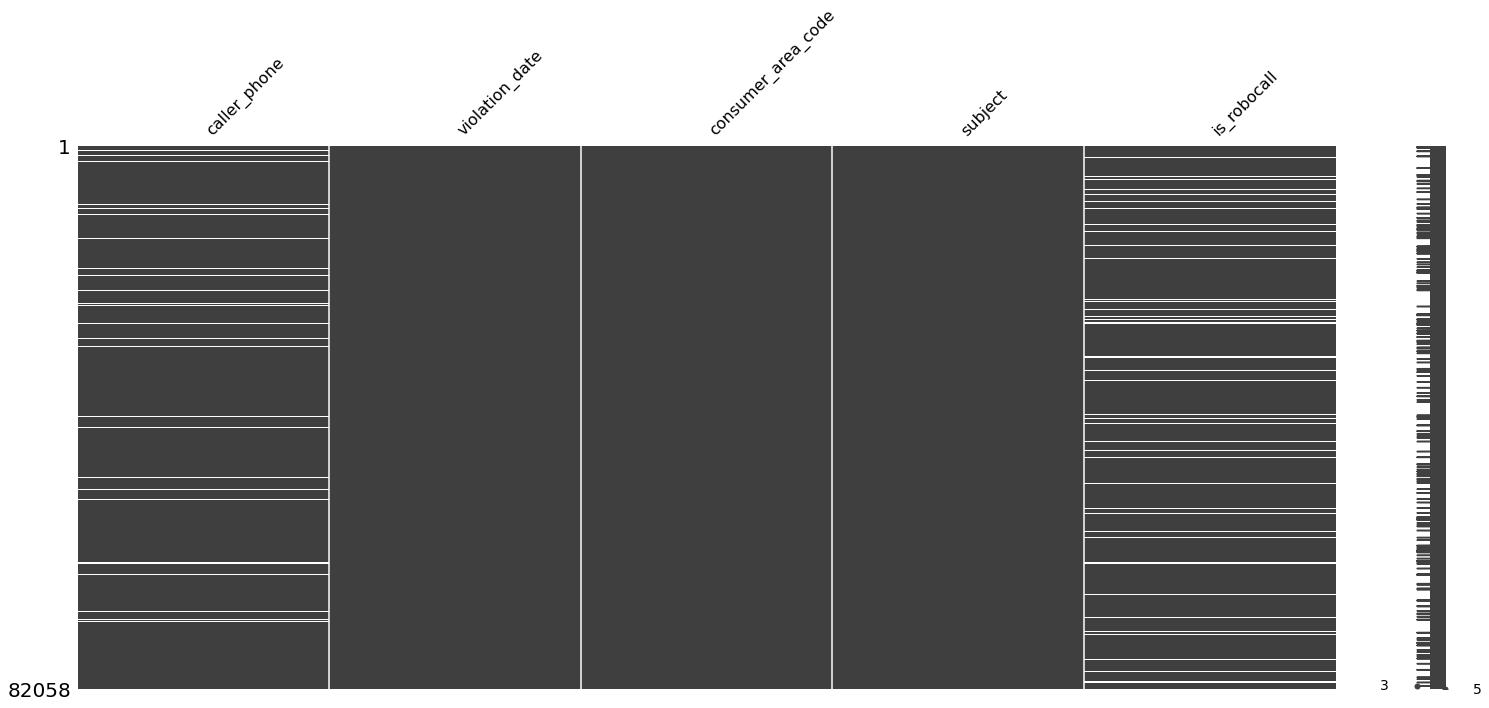

In [5]:
miss.matrix(donotcall)

For the variables of "subject", "consumer_area_code", "violation_date", there is no nulls, the variable of "caller_phone" has 3781 nulls and the variable of "is_robocall" has 6097 nulls. 

2.Create a variable called same area code which has a value of 1 if the caller and consumer have the same area code, and 0 otherwise.

In [39]:
##tranfer the data type into "str"
donotcall["caller_phone"]=donotcall["caller_phone"].astype(str)
##create a new column of the first three number of "caller_phone"
donotcall["caller_area_code"]=[x[:3] for x in donotcall["caller_phone"]]
##compare the two columns and create a new column 
donotcall["same_area_code"]=np.where((donotcall["caller_area_code"]==donotcall["consumer_area_code"]), 1, 0)
##drop extra column
donotcall=donotcall.drop(columns=["caller_area_code"])
donotcall.head()

,caller_phone,violation_date,consumer_area_code,subject,is_robocall,same_area_code
0,9495063579,2020-03-30 14:07:00,858,Other,N,0
1,8443555004,2020-03-19 21:46:00,479,No Subject Provided,Y,0
2,8005256699,2020-03-30 18:47:00,619,Other,Y,0
3,9152680729,2020-03-19 17:35:00,479,No Subject Provided,Y,0
4,7186535424,2020-03-19 11:42:00,479,No Subject Provided,Y,0


3.Assess and drop missing values. Create a target array for is robocall and a feature matrix including only subject and same area code. Encode the target variable values using LabelEncoder().

Since "is_robocall"(the target variable) havs more nulls, we could drop all observations where the outcome is missing. The whole would be meaningless if the y is missing. 

In [7]:
# Drop all observations where the outcome is missing
donotcall_clean = donotcall.dropna()
##reset the index of the df
donotcall_clean.reset_index(drop=True, inplace=True)
#Create a target array for is_robocall 
y_98 = donotcall_clean["is_robocall"]
##Construct a feature matrix including only subject and same area code. 
X_98 = donotcall_clean.filter(["subject","same_area_code"])

In [8]:
#Encode the target variable values using LabelEncoder().
le = LabelEncoder()
##transform the array into df
y_dumm=pd.DataFrame(y_98)
y_dumm.is_robocall = le.fit_transform(y_dumm.is_robocall)
y_dumm.head()

,is_robocall
0,0
1,1
2,1
3,1
4,1


4.In the feature matrix, convert the subject variable to a set of dummy variables for each category. The resulting feature matrix should have a variable for each of the subject types (Charities, Debt collection, etc.) and no longer include the variable subject.

In [9]:
##check out the categories in the column
X_98['subject'].unique()

array(['Other', 'No Subject Provided', 'Dropped call or no message',
       'Calls pretending to be government, businesses, or family and friends',
       'Reducing your debt (credit cards, mortgage, student loans)',
       'Warranties  & protection plans', 'Medical  & prescriptions',
       'Home improvement  & cleaning', 'Vacation  & timeshares',
       'Home security  & alarms', 'Energy, solar,  & utilities',
       'Computer  & technical support',
       'Work from home  & other ways to make money',
       'Lotteries, prizes  & sweepstakes', 'Charities', 'Debt collection'],
      dtype=object)

In [40]:
##convert the subject variable to a set of dummy variables for each category
X_dumm=pd.get_dummies(X_98,columns = ["subject"], drop_first =True)
X_dumm.head()

,same_area_code,subject_Charities,subject_Computer & technical support,subject_Debt collection,subject_Dropped call or no message,"subject_Energy, solar, & utilities",subject_Home improvement & cleaning,subject_Home security & alarms,"subject_Lotteries, prizes & sweepstakes",subject_Medical & prescriptions,subject_No Subject Provided,subject_Other,"subject_Reducing your debt (credit cards, mortgage, student loans)",subject_Vacation & timeshares,subject_Warranties & protection plans,subject_Work from home & other ways to make money
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


5.Fit a decision tree classifier using the entire set of observations. Evaluate the performance of the model using five-fold cross-validation. What is the mean accuracy score?

In [11]:
#Fit a decision tree classifier using the entire set of observations.
# Initialize algorithm
dt = DecisionTreeClassifier(random_state=0) # random_state is set to settle ties
# Fit data
dt.fit(X_dumm, y_dumm)

DecisionTreeClassifier(random_state=0)

In [12]:
#Evaluate the performance of the model using five-fold cross-validation
# Apply cross validation
scores = cross_val_score(dt,X_dumm,y_dumm,cv=5)
# Print all five scores from each fold
for i, each in enumerate(scores):
    print(f"CV {i+1}, accuracy score: {each}")

CV 1, accuracy score: 0.7404725860593695
CV 2, accuracy score: 0.7399947340705635
CV 3, accuracy score: 0.7408504476040021
CV 4, accuracy score: 0.7407846234860452
CV 5, accuracy score: 0.7402580305423907


In [13]:
# Get mean score across 5 folds
print(f"Mean CV accuracy score: {scores.mean()}")
#the mean accuracy score is 0.74

Mean CV accuracy score: 0.7404720843524741


6.Construct a validation curve to assess performance for a maximum tree depth ranging from 1 through 10. What tree depth would you select, based on the validation curve?

In [41]:
##create an empty list 
train_acc = []
max_depth = range(1, 11)
for each in max_depth:
    mod = DecisionTreeClassifier(max_depth=each)
    mod.fit(X_dumm, y_dumm)
    train_acc.append(mod.score(X_dumm, y_dumm))

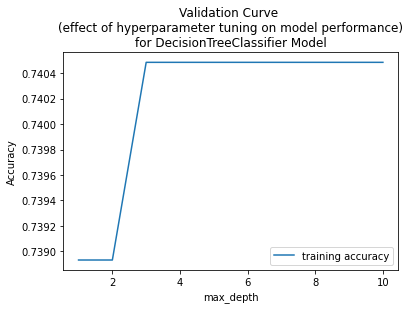

In [33]:
# Fewer neighbors is a more complex model so when n is low training accuracy is high, but generalization is lower
# As we adjust the neighbors hyperparameter, we introduce bias so it doesn't fit the training data as well
# But in return, we get lower model variance and improve the models generalization performance
plt.plot(max_depth, train_acc, label="training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.title('Validation Curve \n(effect of hyperparameter tuning on model performance)\nfor DecisionTreeClassifier Model')
plt.legend();

In [36]:
## another way to achieve the same result 
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    '''
    Argument: X, y, tree_depths; Default:cv=5, scoring='accuracy'
    return: cv_scores_mean, cv_scores_std, accuracy_scores
    '''
    ##create empty lists
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    ## loop thru
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    ##store the results in array
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  

In [15]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    """
    Argument: depths, cv_scores_mean, cv_scores_std, accuracy_scores, title
    return: the graph of the "accuracy per decision tree depth"
    """
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='all_data accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [16]:
##call the function
# fitting trees of depth 1 to 10
sm_tree_depths = range(1,11)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_dumm, y_dumm, sm_tree_depths)

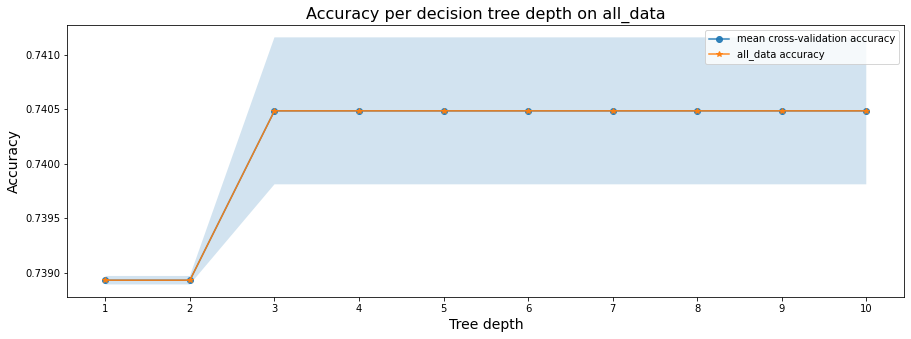

In [17]:
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on all_data')

Based on the validation curve, I would select tree depth of 3. Since it is the first point(the lowest tree) reaches the highest mean cross-validation accuracy. The accuracy does not increase when tree depth beyond 3, which mean the model converges at the depth of 3.

7.Split the data into training and test sets, holding out 20% of the data for testing. Fit a decision tree classifier with the training data using the maximum depth you selected from Q6. What is the accuracy score for the test data?

In [18]:
#donotcall_clean
#Encode the target variable values using LabelEncoder().
le1 = LabelEncoder()
donotcall_clean.is_robocall = le.fit_transform(y_dumm.is_robocall)
y_dumm.head()

,is_robocall
0,0
1,1
2,1
3,1
4,1


In [19]:
##set Y and X
y0 = donotcall_clean["is_robocall"]
##transform the array into df
y=pd.DataFrame(y0)
y.is_robocall = le.fit_transform(y.is_robocall)

X0 = donotcall_clean[["same_area_code", "subject"]]
X=pd.get_dummies(X0)
#Split the data into training and test sets, holding out 20% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
##Fit a decision tree classifier with the training data using the maximum depth selected from Q6
# Initialize algorithm
DTC = DecisionTreeClassifier(max_depth=3,random_state=0) # random_state is set to settle ties
# Fit data
DTC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
# Evaluate model on training
print(f"Training accuracy: {DTC.score(X_train, y_train)}")

Training accuracy: 0.7411466561348078


In [22]:
# Evaluate model on test
print(f"Testing accuracy: {DTC.score(X_test, y_test)}")

Testing accuracy: 0.7378397946422695


The accuracy score for the test data is 0.73.

8.Construct a confusion matrix for the model in Q7. Which type of classification error is most prevalent?

In [23]:
# Make predictions on unseen data using the test set
y_test_pred = DTC.predict(X_test)
#Confusion Matrix of DecisionTreeClassifier
confusion_matrix(y_test, y_test_pred)

array([[   48,  3948],
       [   35, 11162]], dtype=int64)

In [24]:
# Assess using relevant metrics: confusion matrix   true/pred   #  no/no |  no/yes # yes/no |  yes/yes
pd.DataFrame(confusion_matrix(y_test, y_test_pred),
            columns=["Predicted negative", "Predicted positive"],
            index=["Actual negative","Actual positive"]).style.background_gradient(cmap="summer")

,Predicted negative,Predicted positive
Actual negative,48,3948
Actual positive,35,11162


In [38]:
# Metrics (dt)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.01      0.02      3996
           1       0.74      1.00      0.85     11197

    accuracy                           0.74     15193
   macro avg       0.66      0.50      0.44     15193
weighted avg       0.70      0.74      0.63     15193



Set 0 as the negative and 1 as the positive. We could see from the results that the model performs poorly on predicting 0(with the recall score to be 0.01). In other words, the model predicts too much false positive. In this case, it commits a Type 1 error.    

9.Plot the decision tree. Provide an interpretation of the plot.

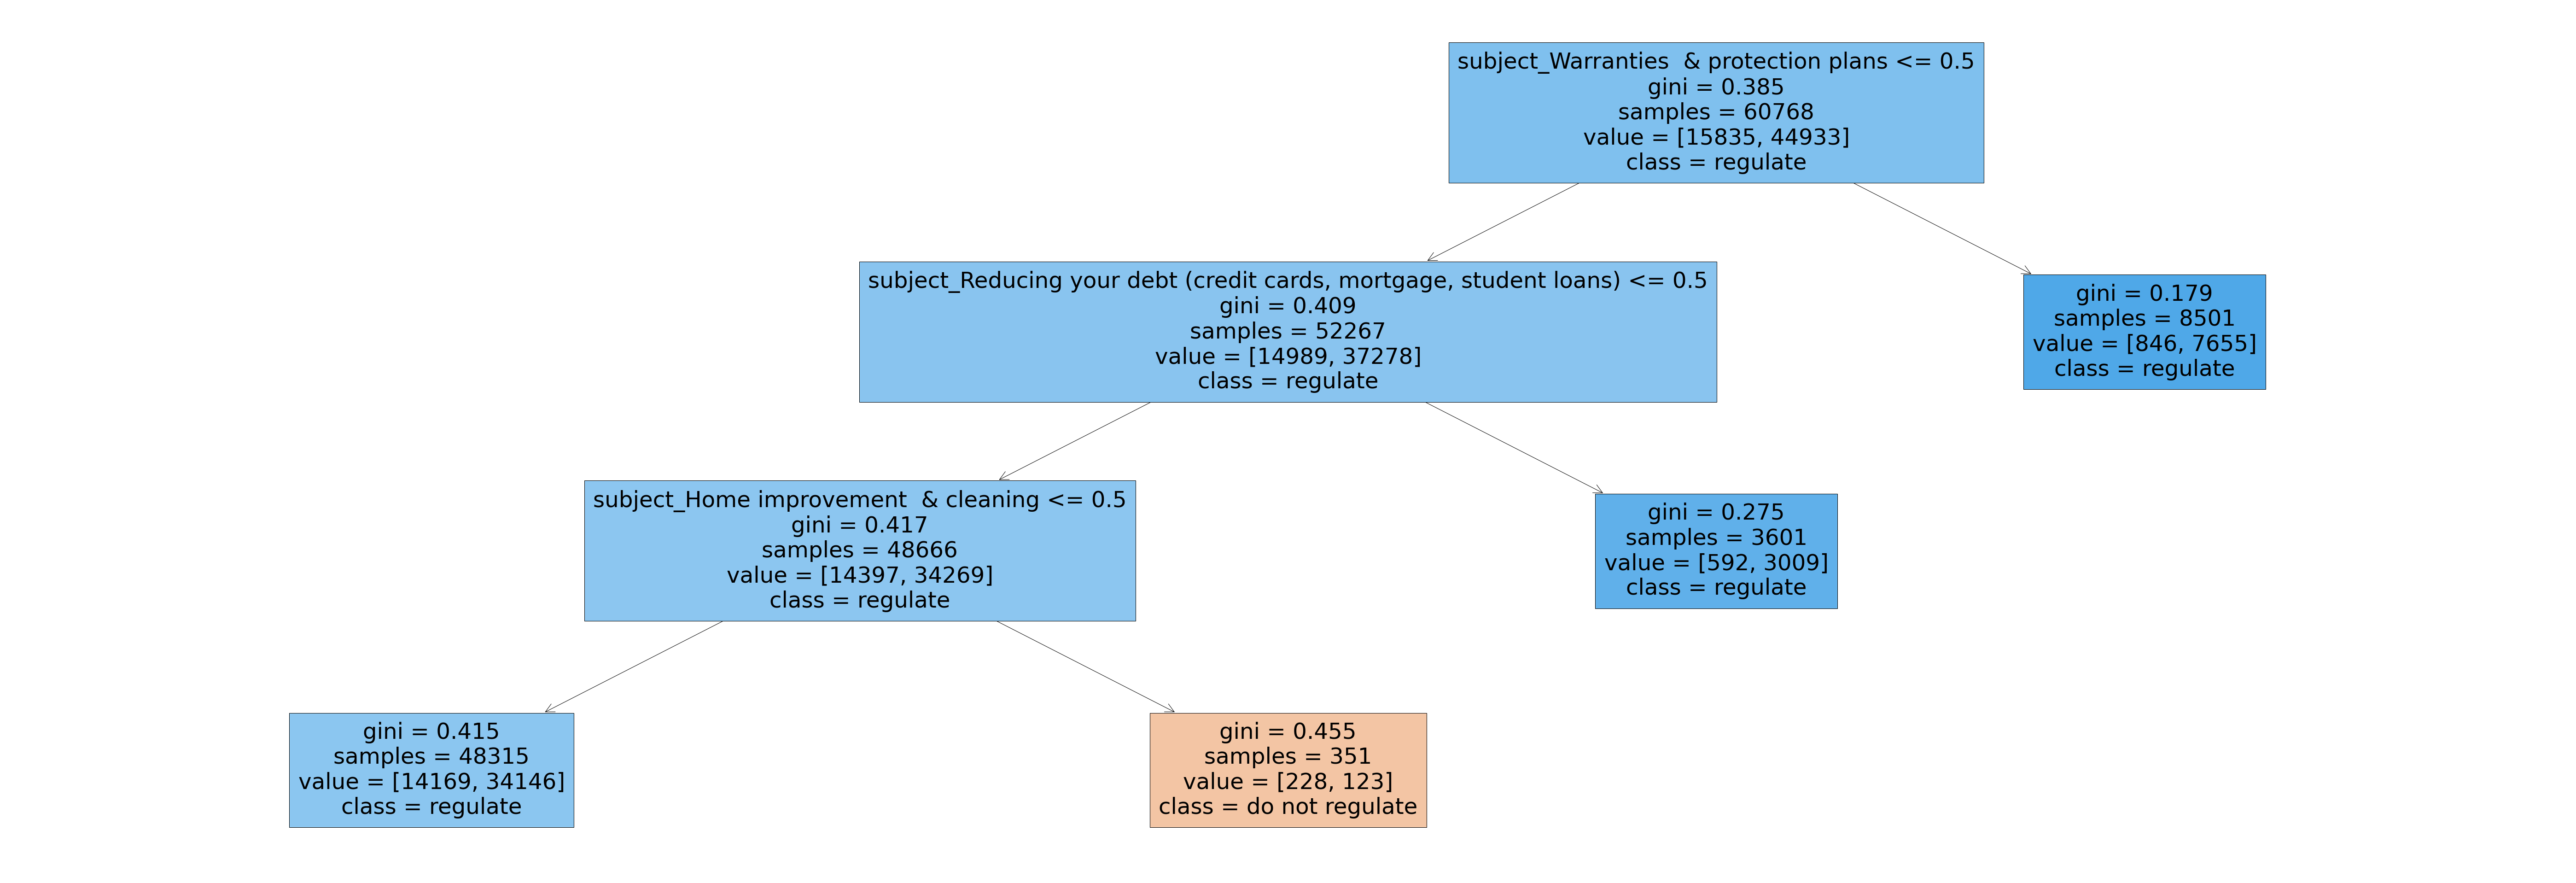

In [25]:
##Plot the decision tree
fig = plt.figure(figsize=(100, 35)) # width, length of output
_ = tree.plot_tree( ,
                  feature_names=X.columns,
                  class_names=["do not regulate", "regulate"],
                  filled=True,
                  impurity=True)


This is a 3-depth decision tree with the root node of "subject_Warranties & protection plans". In the third depth, the model successfully classifies 0(the negative) with its classification that 228 are 0(negative) and 123 are 1(positive). However, it is a relatively weak classifier since it misses a lot of negative cases. In the first classification, it misses 846 negative cases; in the second classification, it misses 592 negative cases. Only in the third classification it correctly predicts 228 negative cases but misses 14169 negative cases.  